# Long Short Term Memory(LSTM) based - Stock predicition - # CPU based

Aim -to predict the Opening stock price using past 60 day stock price.



In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt



/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


## Data prep

Works on Yahoo based data. (Doesnt contain Indian stock values) 

In [0]:
ticker = 'AMZN'  #amazon  start=   end = current date

In [0]:
ticker = 'TSLA'  #Tesla start=   end = current date

In [0]:
ticker = 'UBER'  #Uber start=   end = current date

In [0]:
ticker = 'TSLA'  #Tesla start=   end = current date

Change start and end date for collection, as per Company.  (Start date cant be before the company was founded.)

Different approaches can be used for Date collection - 


1.   Pretrain on 20+ year dataset, finetune for local
2.   Event specific timings - As in 2020, covid may lead to a new stock trading pattern.



In [4]:
#Get stock quote - we import just the opening and closing Prices of stock, over 20 years duration

df=web.DataReader(ticker, data_source='yahoo', start='2015-01-01', end='2020-05-24')    #YYYY-MM-DD
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995
...,...,...,...,...,...,...
2020-05-18,834.719971,803.880005,827.780029,813.630005,11698100,813.630005
2020-05-19,822.070007,806.080017,815.169983,808.010010,9636500,808.010010
2020-05-20,826.000000,811.799988,820.500000,815.559998,7309300,815.559998


In [5]:
df.shape

(1357, 6)

In [0]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

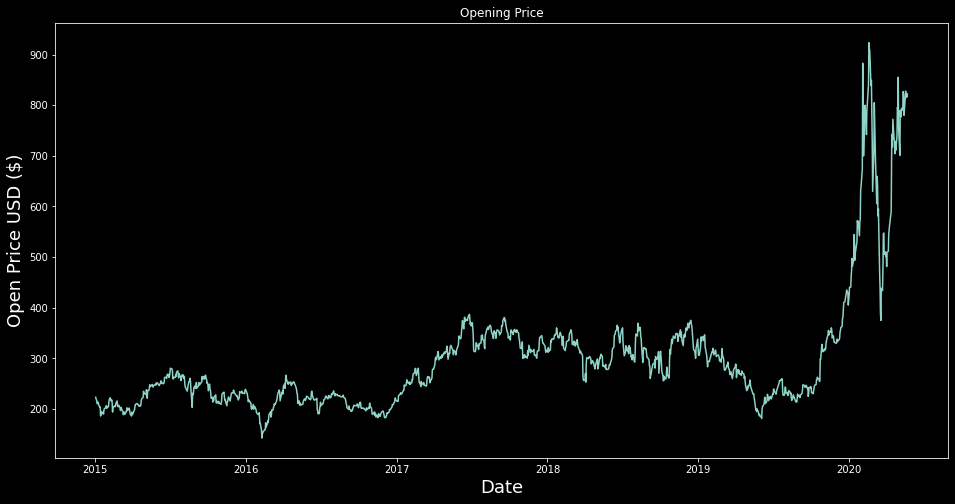

In [7]:
plt.figure(figsize=(16,8))
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

In [8]:
data=df.filter(['Open'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1086

In [0]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [10]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.10311322, 0.09246268, 0.08671496, 0.09092655, 0.09023527,
       0.08525563, 0.07774136, 0.078087  , 0.05569778, 0.06678358,
       0.06193194, 0.0659899 , 0.06045981, 0.06999666, 0.07420823,
       0.07617962, 0.07949511, 0.08165851, 0.07520674, 0.07890627,
       0.07891906, 0.09076013, 0.0972503 , 0.09928569, 0.10199953,
       0.09352518, 0.09630302, 0.08946722, 0.06560588, 0.07754933,
       0.08113366, 0.07917508, 0.08023758, 0.08763664, 0.09388361,
       0.08316903, 0.08016078, 0.07895747, 0.08266979, 0.07729331,
       0.06975344, 0.07287692, 0.07748534, 0.07282573, 0.06665556,
       0.05906449, 0.06250798, 0.06583629, 0.05969174, 0.06359609,
       0.06798687, 0.06738524, 0.07639724, 0.07057271, 0.07191684,
       0.07585959, 0.07162241, 0.06605391, 0.05984536, 0.05572339])]
[0.06555466337491336]



In [0]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1026, 60, 1)

## Model training 

In [0]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [16]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/3
1026/1026 [==============================] - 41s 40ms/step - loss: 6.0275e-04
Epoch 2/3
1026/1026 [==============================] - 39s 38ms/step - loss: 3.1290e-04
Epoch 3/3
1026/1026 [==============================] - 40s 39ms/step - loss: 2.3827e-04


## Testing and Validating model

In [0]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [0]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [0]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [0]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [21]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



13.30443784143652

In [0]:
#choose plotting style

#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')
#plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


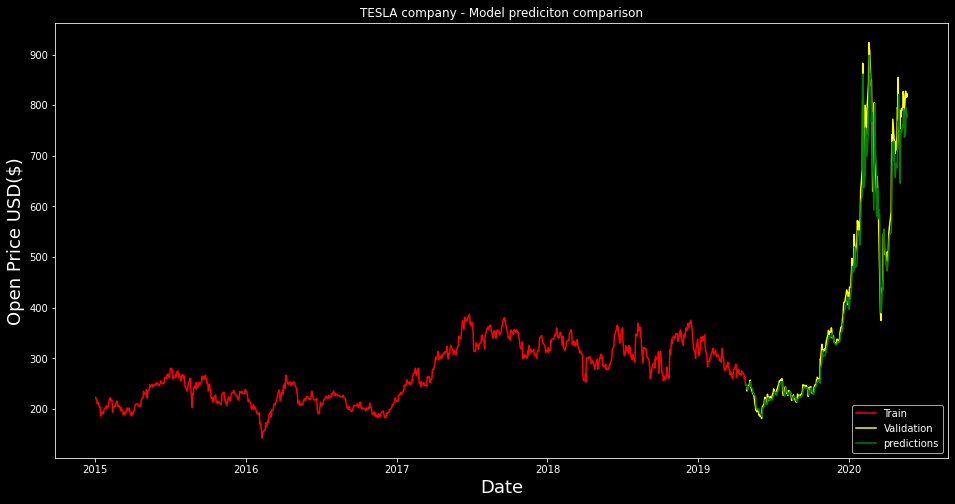

In [29]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('TESLA company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD($)', fontsize=18)
plt.plot(train['Open'] , color='red')
plt.plot(valid['Open'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('/content/prediction.png')
plt.show()


In [24]:
#Show the valid and predicted prices

valid.tail(15)

,Open,predictions
Date,,
2020-05-04,701.000000,709.715271
2020-05-05,789.789978,645.539734
2020-05-06,776.500000,747.885864
2020-05-07,777.210022,751.892517
2020-05-08,793.770020,745.990112
2020-05-11,790.510010,761.072388
2020-05-12,827.000000,757.015015
2020-05-13,820.830017,793.543884
2020-05-14,780.000000,785.950439


# Getting predicitions - for tomorrow

In [25]:
#Get the quote
stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

Opening Price of TSLA tomorrow:[[783.4997]]


## Getting predicitions for 2 months from now ?

In [26]:
#Get the quote
stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end='2020-05-24')

new_df=stock_quote.filter(['Open'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Opening Price of {ticker} tomorrow:{pred_price}')

Opening Price of TSLA tomorrow:[[783.4997]]
